In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm as LogNorm
from matplotlib import cm
import numpy as np
from scipy import stats

# Bayes Theorem - Numerical Solution

From the assignment description:

Bayes' Theorem reads:

$$ P(signal|data) = \frac{P(data|signal)P(signal)}{P(data)}$$

Effectively the goal is to find $P(signal|data)$.

Reading through Bayes' theorem, it says that given a data reading, the probability it was produced by a given true signal $(P(signal|data))$, is equal to the probability of getting a particular data reading given a certain true signal $(P(data|signal))$ times the probability of the signal having a particular strength $(P(signal))$, divided by the probability of each data reading $(P(data))$.

This is just math, so is true. But in practice it is quite subtle how to use this. A few pointers:
<ul>
<li>$P(signal|data)$ is what we want to know. What was the probability distribution of the true signal given the measurement we have? Unfortunately it is hard to calculate from first principles.</li>
<li>$P(data|signal)$ Is usually easy to determine. If we have a signal-free background (see first 4 weeks of this class), we can <em>inject</em> fake signals of known strength and then simulate the observations in the presence of known (fake) signals. This means we can easily generate $P(data|signal)$.</li>
<li>$P(signal)$ is called a prior. It is the probability the signal has a particular strength. Priors can be used to great effect, such as in combining the results of multiple particle physics experiments. But it is also the source of 90% of all statistical mistakes. It is <em>incredibly</em> dangerous. Almost all of the time—and always in this class—we will want a weak/uniform prior. One of the most dangerous bits of using Bayes' Theorem is that it is easy to have an implicit prior which will give you the wrong answer and you don't know why. </li>
<li>$P(data)$ in the denominator is almost always just a normalization factor, and is often dropped. This means the result will have to be renormalized, usually by making sure the full $P(signal|data)$ integrates to one.  </li>
</ul>

In [25]:
bkgd = stats.norm.rvs(loc=0., scale=4., size=1000000)
signal = stats.uniform.rvs(loc=0, scale=20, size=1000000)

data = bkgd + signal

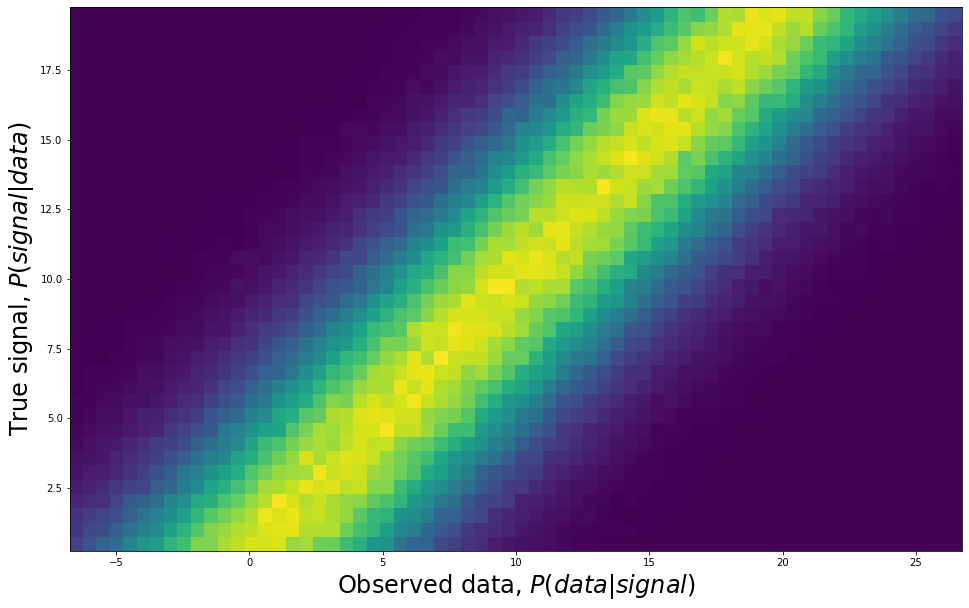

In [26]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(16,10) 

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data, signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2

plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(signal|data)$', fontsize = 24)
plt.xlabel('Observed data, $P(data|signal)$', fontsize = 24);

This shows that for each true signal (y-axis), we get a range of measurements (x-axis) according to the distribution of our background.

For problem 1b, we are asked to select a true injected signal and plot $P(data|signal)$. I choose a true signal of 14.

In [41]:
d14 = []
for i in range(len(data)):
    if (13.99 < signal[i] < 14.01):
        d14.append(data[i])

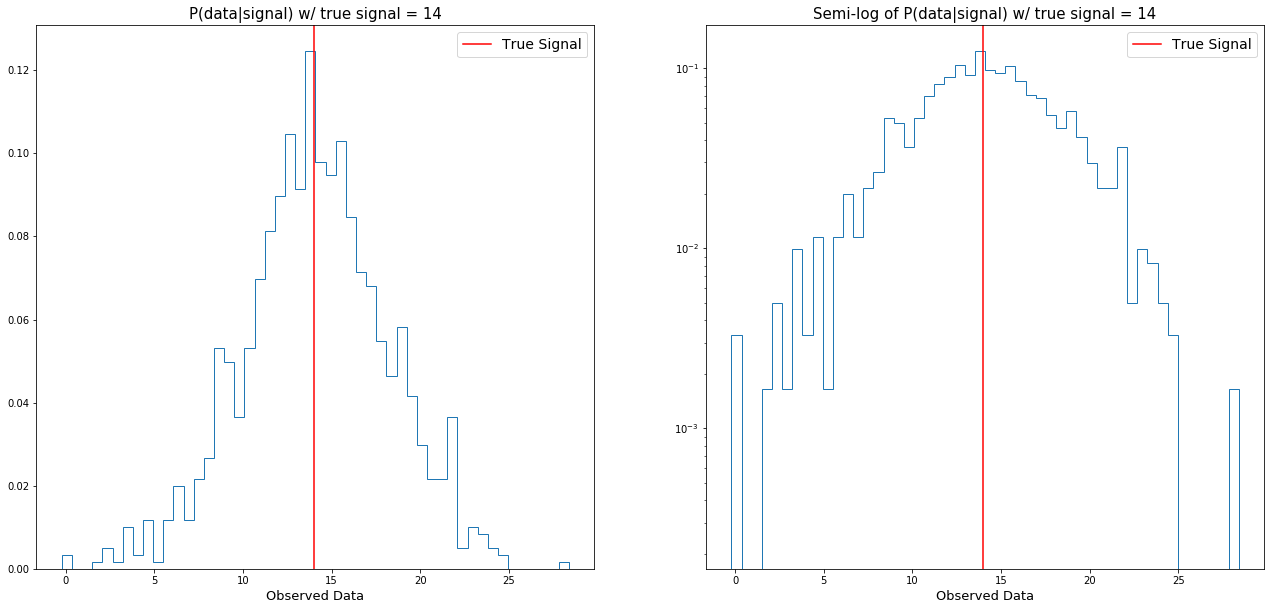

In [42]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(22,10) 

ax[0].hist(d14, bins=50, histtype='step', density=True)
ax[0].set_title("P(data|signal) w/ true signal = 14",fontsize=15)
ax[0].set_xlabel("Observed Data", fontsize=13)

ax[1].hist(d14, bins=50, histtype='step', density=True, log=True)
ax[1].set_title("Semi-log of P(data|signal) w/ true signal = 14",fontsize=15)
ax[1].set_xlabel("Observed Data", fontsize=13)

ax[0].axvline(14, c='red', label='True Signal')
ax[1].axvline(14, c='red', label='True Signal')
ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)

plt.show()

These plots represent a horizontal slice of the 2D plot from earlier. Given a true signal strength of 14, we follow that tick on the y-axis across and make note of non-zero probability values and their associated observed value, if we were trying to replicate these plots by hand. It shows us how our true signal is shifted by the Gaussian background to even include negative observed signals. 

For problem 1c, we are asked to do the reverse - pick a set observed signal (I choose 14 again), and take a vertical slice of the 2D histogram to visualize the probability of obtaining that observed signal for a range of true signals.

In [48]:
s14 = []
for i in range(len(data)):
    if (13.99 < data[i] < 14.01):
        s14.append(signal[i])

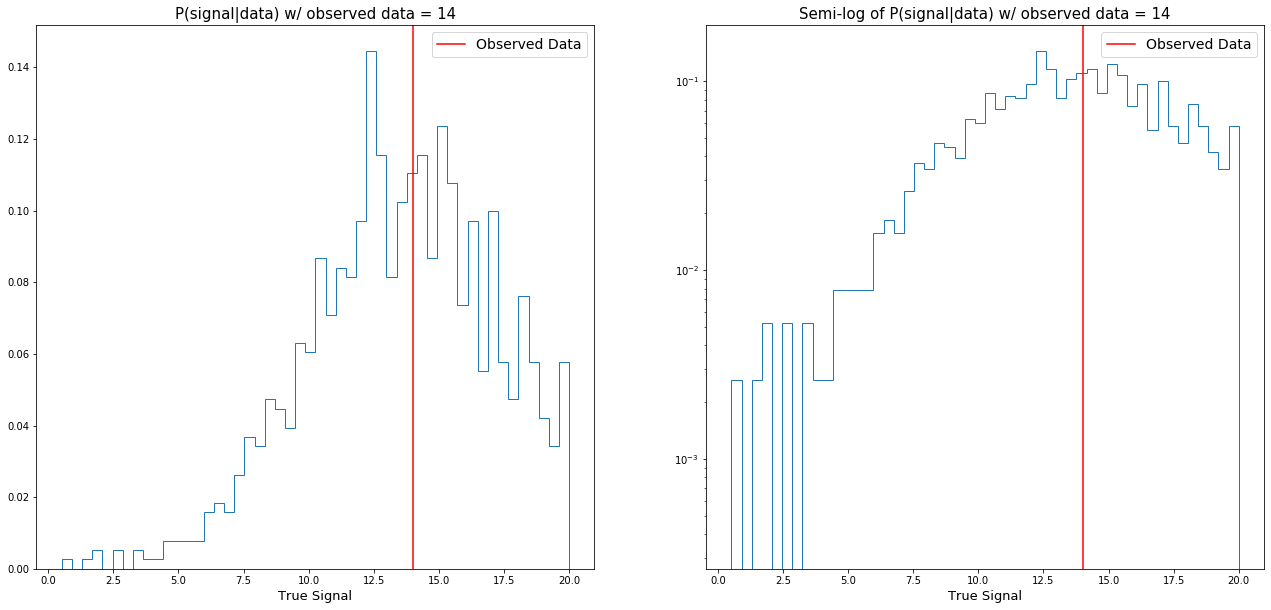

In [49]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(22,10) 

ax[0].hist(s14, bins=50, histtype='step', density=True)
ax[0].set_title("P(signal|data) w/ observed data = 14",fontsize=15)
ax[0].set_xlabel("True Signal", fontsize=13)

ax[1].hist(s14, bins=50, histtype='step', density=True, log=True)
ax[1].set_title("Semi-log of P(signal|data) w/ observed data = 14",fontsize=15)
ax[1].set_xlabel("True Signal", fontsize=13)

ax[0].axvline(14, c='red', label='Observed Data')
ax[1].axvline(14, c='red', label='Observed Data')
ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)

plt.show()

Here, we see that the range of true signals we have measured with noise in order to obtain an observed value of 14 is cut off, constrained from 0 to 20; and the probability distribution dictating that we got these signals ($P(signal|data)$ is asymmetric (as opposed to $P(data|signal)$. 

For problem 2, we are asked to repeat this procedure with a background with a non-zero mean. I choose a Gaussian of mean 12 and scale 4.

In [50]:
newbkgd = stats.norm.rvs(loc=12., scale=4., size=1000000)
newsignal = stats.uniform.rvs(loc=0, scale=20, size=1000000)

newdata = newbkgd + newsignal

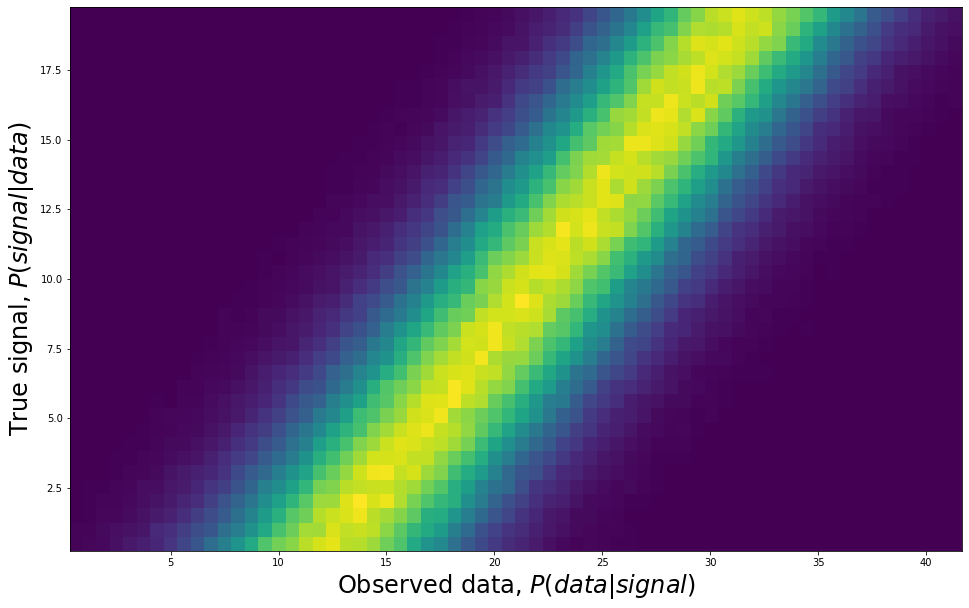

In [55]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(16,10) 

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(0,42,68)

Psd, temp, temp2= np.histogram2d(newdata, newsignal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2

plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(signal|data)$', fontsize = 24)
plt.xlabel('Observed data, $P(data|signal)$', fontsize = 24);

In [65]:
d20 = []
for i in range(len(newdata)):
    if (19.99 < newsignal[i] < 20.01):
        d20.append(newdata[i])

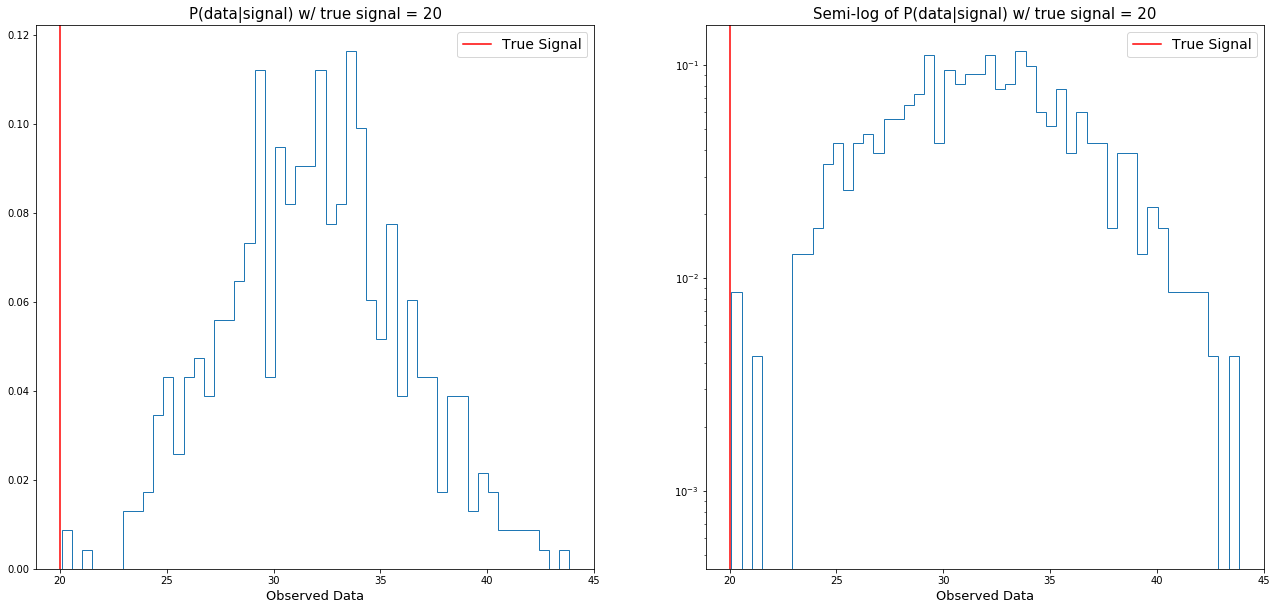

In [66]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(22,10) 

ax[0].hist(d20, bins=50, histtype='step', density=True)
ax[0].set_title("P(data|signal) w/ true signal = 20",fontsize=15)
ax[0].set_xlabel("Observed Data", fontsize=13)

ax[1].hist(d20, bins=50, histtype='step', density=True, log=True)
ax[1].set_title("Semi-log of P(data|signal) w/ true signal = 20",fontsize=15)
ax[1].set_xlabel("Observed Data", fontsize=13)

ax[0].axvline(20, c='red', label='True Signal')
ax[1].axvline(20, c='red', label='True Signal')
ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)

plt.show()

In [67]:
s20 = []
for i in range(len(newdata)):
    if (19.99 < newdata[i] < 20.01):
        s20.append(newsignal[i])

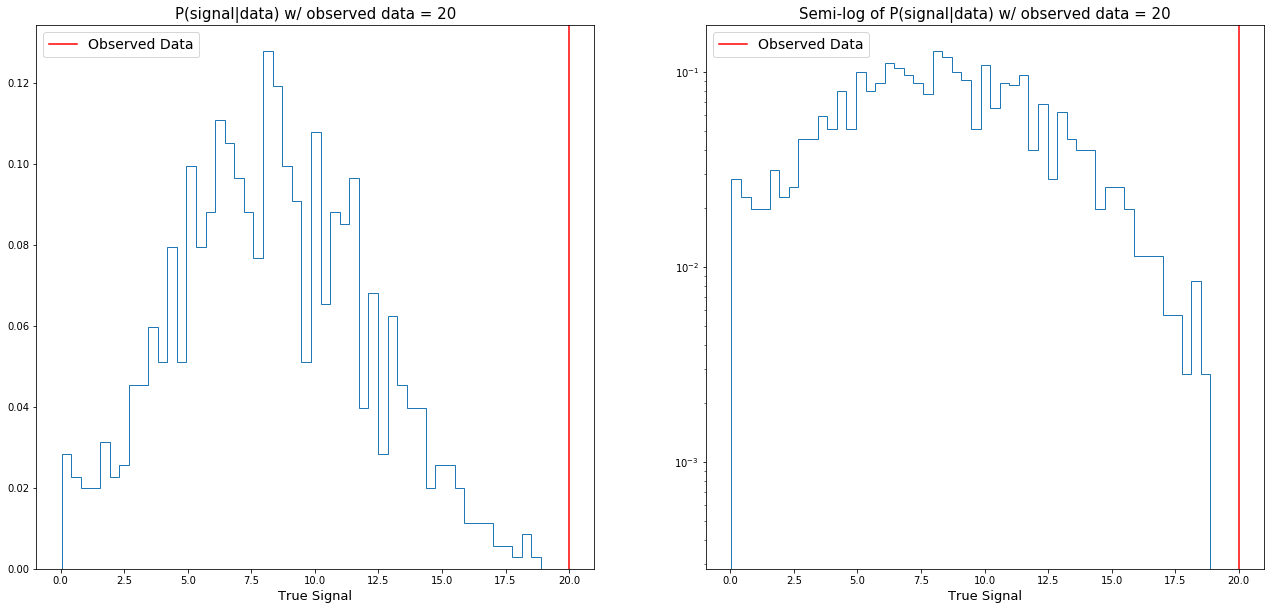

In [68]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(22,10) 

ax[0].hist(s20, bins=50, histtype='step', density=True)
ax[0].set_title("P(signal|data) w/ observed data = 20",fontsize=15)
ax[0].set_xlabel("True Signal", fontsize=13)

ax[1].hist(s20, bins=50, histtype='step', density=True, log=True)
ax[1].set_title("Semi-log of P(signal|data) w/ observed data = 20",fontsize=15)
ax[1].set_xlabel("True Signal", fontsize=13)

ax[0].axvline(20, c='red', label='Observed Data')
ax[1].axvline(20, c='red', label='Observed Data')
ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)

plt.show()

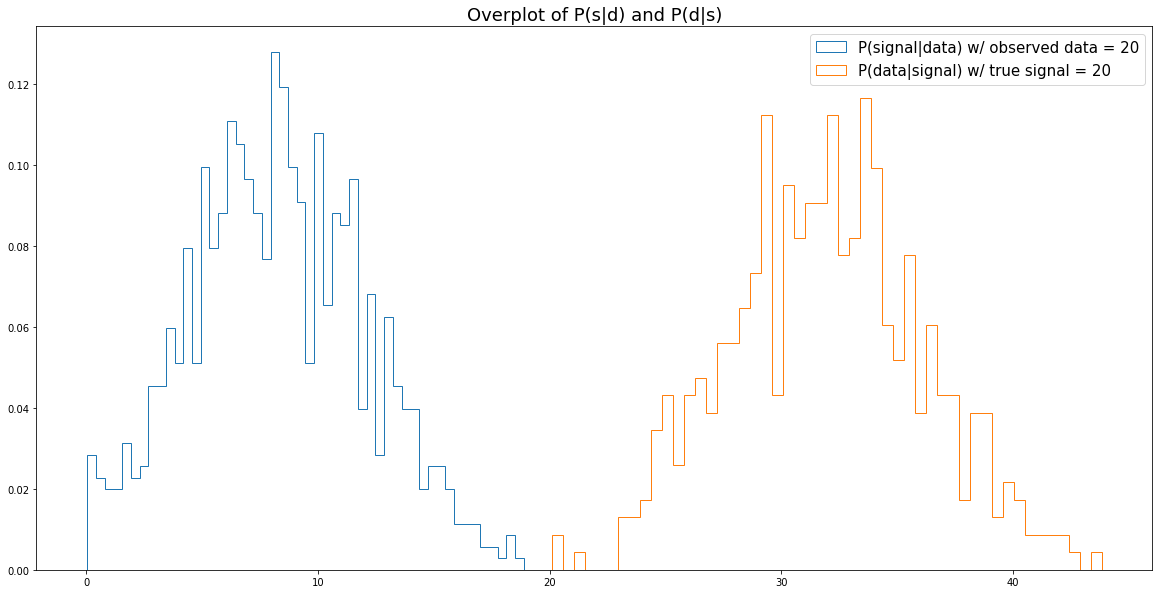

In [75]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(20,10) 

ax.hist(s20, bins=50, histtype='step', density=True, label='P(signal|data) w/ observed data = 20')
ax.hist(d20, bins=50, histtype='step', density=True, label='P(data|signal) w/ true signal = 20');

ax.set_title('Overplot of P(s|d) and P(d|s)',fontsize=18)
ax.legend(fontsize=15);

Now that the background distribution has a mean of 12, it has drastically shifted the observed data from the true signal. Now, if our observed data is 20, it is more likely that our signal is lower (by 14, on average). Alternatively, if our true signal is 20, it is more likely that our observed data will be higher - again, by 14 on average.